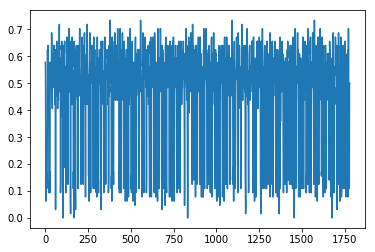

In [2]:
# run models notebook -- similar to import
%run models.ipynb

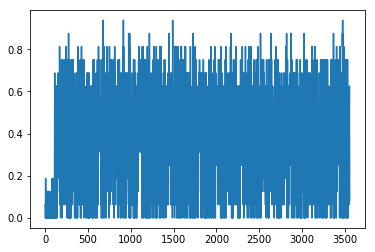

In [3]:
# training different linear models
## baseline model
model, variables = create_linear_classifier(data,death,optimizer_name="adam",learning_rate= 0.1,
                                                batch_size=16,epochs=20)
train_model(model,variables)

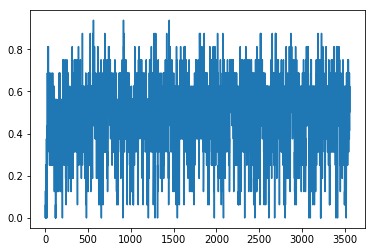

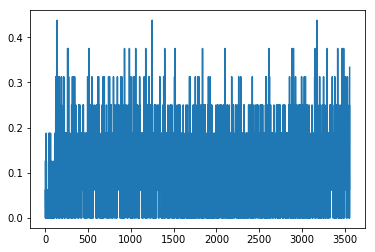

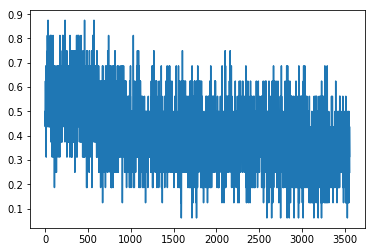

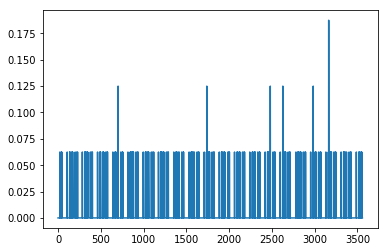

In [5]:
# vary learning rate

## learning rate = 0.01
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.01,
                                              batch_size=16,epochs=20)
train_model(model,variables)

## learning rate = 0.001
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.001,
                                              batch_size=16,epochs=20)
train_model(model,variables)

## learning rate = 0.0001
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.0001,
                                              batch_size=16,epochs=20)
train_model(model,variables)

## learning rate = 0.00001
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.00001,
                                              batch_size=16,epochs=20)
train_model(model,variables)

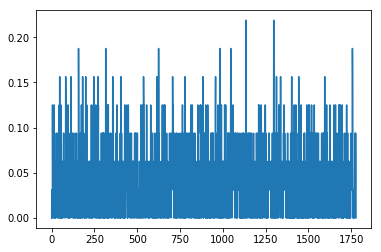

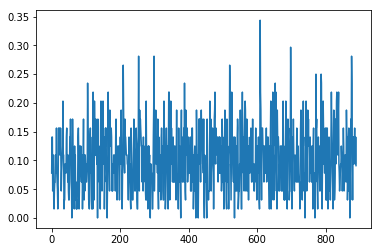

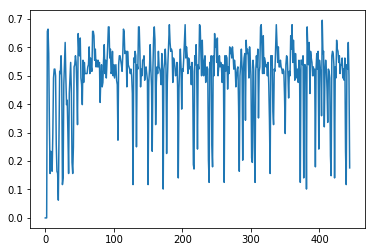

In [6]:
# vary batch size

## size = 32
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.1,
                                              batch_size=32,epochs=20)
train_model(model,variables)

## size = 64
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.1,
                                              batch_size=64,epochs=20)
train_model(model,variables)

## size = 128
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate=0.1,
                                              batch_size=128,epochs=20)
train_model(model,variables)

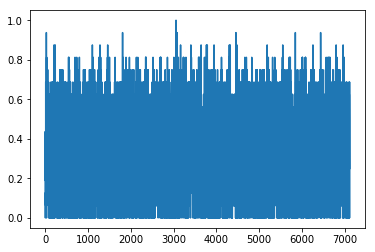

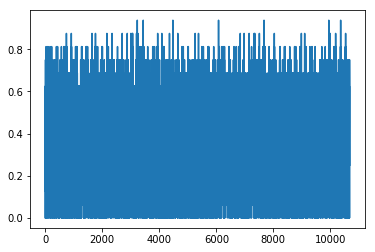

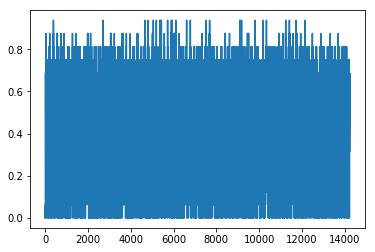

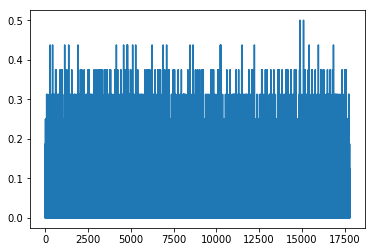

In [7]:
# vary epochs
## epochs = 40
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16,epochs=40)
train_model(model,variables)

## epochs = 60
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16,epochs=60)
train_model(model,variables)

## epochs = 80
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16,epochs=80)
train_model(model,variables)

## epochs = 100
model, variables = create_linear_classifier(data,death,optimizer_name="Adam",learning_rate= 0.1,
                                                batch_size=16,epochs=100)
train_model(model,variables)

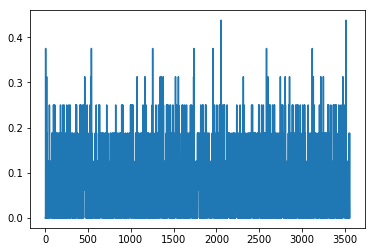

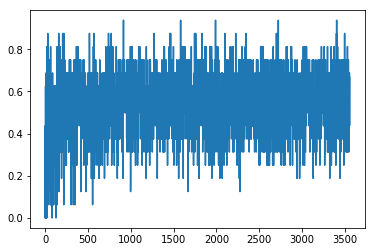

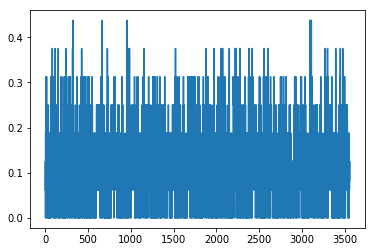

In [9]:
# vary optimizer
## Gradient Descent
model, variables = create_linear_classifier(data,death,optimizer_name="GD",learning_rate= 0.1,
                                                batch_size=16,epochs=20)
train_model(model,variables)

## Adagrad
model, variables = create_linear_classifier(data,death,optimizer_name="Adagrad",learning_rate= 0.1,
                                                batch_size=16,epochs=20)
train_model(model,variables)

## Adadelta
model, variables = create_linear_classifier(data,death,optimizer_name="Adadelta",learning_rate= 0.1,
                                                batch_size=16,epochs=20)
train_model(model,variables)

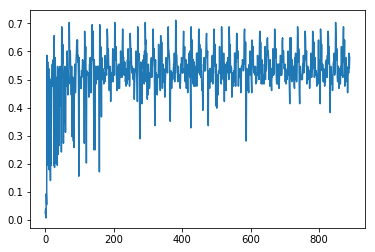

In [20]:
## learning rate = 0.1, batch size = 128, epochs = 40, optimizer = Adagrad
model, variables = create_linear_classifier(data,death,optimizer_name="Adagrad",learning_rate= 0.1,
                                                batch_size=128,epochs=40)
train_model(model,variables)

Conclusion: not very strong model. The best training accuracy I could get converges at 50%-60% accuracy.